$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

# TP Recuit simulé pour le problème du voyageur de commerce

## Voyageur de commerce

Dans ce TP, on s'intéresse au problème du [voyageur de commerce](https://fr.wikipedia.org/wiki/Problème_du_voyageur_de_commerce). Etant données $n$ villes, positionnées dans l'espace en positions $V_1, \ld, V_n$, le problème consiste à trouver une tournée de longueur minimale, c'est-à-dire une permutation $x$ du groupe symétrique $S_n$ minimisant la fonction
 $$
x \in S_n \longmapsto H(x) := \sum_{i=1}^n\op{dist} (V_{x(i)}, V_{x(i+1)})\;\;\text{ où }\; x(n + 1) := x(1).
$$
La longueur d'une tournée joue le rôle d'énergie ici. 

Ce problème d'optimisation est très simple à décrire mais particulièrement difficile à résoudre.
Une méthode simple consisterait à calculer $H(x)$ pour toutes les permutations $x$. 
Mais lorsque $n$ est élevé, cette méthode est irréalisable. C'est le cas  dès que le nombre de villes dépasse la dizaine : le cardinal de $S_n$ est de $n!$ (par exemple,  pour $n=30$, $n!\simeq 2.10^{32}$).

Pour essayer de minimiser H, on propose d'appliquer l'algorithme de recuit simulé en se déplaçant sur  $S_n$ aléatoirement  de proche en proche, ce qui implique d'avoir, sur $S_n$, une notion d'*éléments voisins* (de *permutations voisines*). Par exemple, on peut considèrer comme voisines deux permutations qui se déduisent l'une de l'autre par la permutation de deux éléments seulement. Cette "notion de voisinage" fonctionne, mais dans notre algorithme, nous la remplaçons en fait par une autre, qui permet une convergence plus rapide : nous considérons deux permutations $(x_1,\ldots, x_n)$, $(y_1,\ldots, y_n)$ comme voisines si il existe $1\leq i<k\leq n$ tels que $$(y_1,\ldots, y_n)=(x_1,\ldots, x_{i-1},x_k,x_{k-1},\ldots, x_{i+1},x_i,x_{k+1},\ldots, x_n).$$Par exemple, pour $n=8$, les permutations $$(1,2,3,4,8,7,6,5)\quad\textrm{ et }\quad (1,2,7,8,4,3,6,5)$$ sont voisines (avec $i=3,k=6$). 

## Rappel sur le recuit simulé

On rappelle l'**algorithme du recuit simulé**  de détermination de $x_{\min}$ tel que $$H(x_{\min})\approx \min_E H.$$
 
**Algorithme  du recuit simulé**
1. Choisir un noyau de transition $Q$ irréductible apériodique sur $E$ vérifiant $Q(x,y)=Q(y,x)$ et une fonction $t\mapsto\bet_t$ tendant vers $+\infty$ lentement comme, par exemple $c\log t$.
2. Choisir $x_0\in E$.
3. Répéter un grand nombre de fois :
   + tirer, indépendamment, $Y\sim Q(x_t,\cdot)$ et $U\sim\cU([0,1])$,
   + poser $x_{t+1}=y$ si   $U\le \me^{-\bet_t(H(y)-H(x))}$ et $x_{t+1}=x_t$ sinon.
4. Rendre $x_{\min}:=x_t$.


## Exercice

On souhaite implémenter l'algorithme précédent pour trouver une solution au problème du voyageur de commerce, pour diverses configurations de villes. 

1. On commence par importer les librairies nécessaires, choisir les paramètres, et construire une configuration de villes. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#paramètres
N=100 #nombre de villes
c=2. #pour beta(t)=c*np.log(t)
Npas=int(2e4)

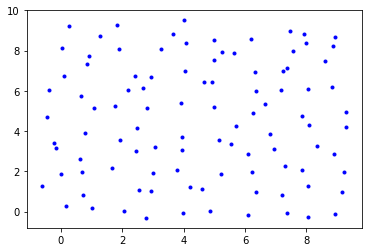

In [30]:
# Configurations de villes 
Configuration="approximategrid" #choisir parmi ["circle","grid","approximategrid","doublecircle","randomsquare","randomGaussian","randomcauchy","approximatecircle","Ginibre"]

if Configuration=="circle":
    Xvilles=np.cos((2*np.pi/N)*np.arange(N))
    Yvilles=np.sin((2*np.pi/N)*np.arange(N))
elif Configuration=="grid":
    M=int(round(np.sqrt(N)))
    N=M**2
    Xvilles=np.array([i for i in range(M)]*M)
    Yvilles=[]
    for j in range(M):
        Yvilles+=[j]*M  
    Yvilles=np.array(Yvilles)
elif Configuration=="approximategrid":
    r=.25
    M=int(round(np.sqrt(N)))
    N=M**2
    Xvilles=np.array([i for i in range(M)]*M)+.0
    Xvilles+=r*np.random.randn(N)
    Yvilles=[]
    for j in range(M):
        Yvilles+=[j]*M  
    Yvilles=np.array(Yvilles)+r*np.random.randn(N)
elif Configuration=="doublecircle":
    r=.5
    if N%2==1:
        N+=1    
    Xvilles=np.cos((2*np.pi/N)*np.arange(N))
    Yvilles=np.sin((2*np.pi/N)*np.arange(N))
    for k in range(int(N/2)):
        Xvilles[2*k]*=r
        Yvilles[2*k]*=r
elif Configuration=="randomsquare":
    Xvilles=np.random.rand(N)
    Yvilles=np.random.rand(N)
elif Configuration=="randomGaussian":
    Xvilles=np.random.randn(N)
    Yvilles=np.random.randn(N)
elif Configuration=="randomcauchy":
    Xvilles=np.tan(np.pi*np.random.rand(N)-.5*np.pi)
    Yvilles=np.tan(np.pi*np.random.rand(N)-.5*np.pi)
elif Configuration=="approximatecircle":
    r,R=.8,1.2
    Xvilles=np.cos((2*np.pi/N)*np.arange(N))
    Yvilles=np.sin((2*np.pi/N)*np.arange(N))
    for k in range(N):
        rho=r+(R-r)*np.random.rand()
        Xvilles[k]*=rho
        Yvilles[k]*=rho
elif Configuration=="Ginibre":
    M=np.random.randn(N,N)+1j*np.random.randn(N,N)
    z=np.linalg.eigvals(M)
    Xvilles=np.array([k.real for k in z])
    Yvilles=np.array([k.imag for k in z])
    
    
ax=min(Xvilles)-.5
bx=max(Xvilles)+.5
ay=min(Yvilles)-.5
by=max(Yvilles)+.5

# Affichage des positions des villes

Villes=np.array([Xvilles,Yvilles]) #tableau 2xN dont chaque colonne est une ville
plt.figure()
plt.plot(Xvilles,Yvilles,"b.")

2. Calculez la matrice des distances entres les villes (si possible sans boucle for).

In [31]:
# Calcul de la matrice des distances entre les villes
y = np.sum(Villes**2,0)
N = len(y)
y = np.reshape(y,(N,1))
Distance = np.sqrt(np.tile(y,(1,N)) + np.transpose(np.tile(y,(1,N))) - 2*np.dot(np.transpose(Villes), Villes))

/Users/delon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


3. Implémentez l'algorithme du recuit simulé pour trouver une solution au problème du voyageur de commerce.
4. Testez l'algorithme pour diverses configurations de villes. 

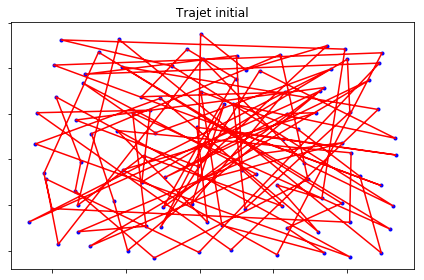

In [32]:
# Affichage du trajet initial (aléatoire)

#ici, x est une permutation de N, cad un tableau de nombres entre 0 et N-1  
x=np.random.permutation(N) 

plt.figure()
plt.plot(Xvilles,Yvilles,"b.")
X_itineraire=[Xvilles[x[i]] for i in range(N)]+[Xvilles[x[0]]]
Y_itineraire=[Yvilles[x[i]] for i in range(N)]+[Yvilles[x[0]]]
plt.plot(X_itineraire,Y_itineraire,"r")
plt.xlim((ax,bx))
plt.ylim((ay,by))
plt.title("Trajet initial")
frame1 = plt.gca()
frame1.set_xticklabels(()) 
frame1.set_yticklabels(()) 
plt.tight_layout() 
plt.show()

In [33]:
# Ecrire une fonction qui à une permutation x associe l'énergie H(x) définie dans le texte
def Energie(x):     
    s=0
    for i in range(N):
        s+=Distance[x[i],x[i-1]]
    return s

# Ecrire une fonction qui à une permutation x et deux entiers i et k associe la différence d'énergie induite 
# par le fait d'échanger x[i] et x[k] et x[i+1] par x[k-1]

def DeltaEnergie(x,i,k):   #ici, x est une permutation et 0=<i<k<N
    return Distance[x[i-1],x[k]]+Distance[x[i],x[(k+1)%N]]-Distance[x[i-1],x[i]]-Distance[x[k],x[(k+1)%N]]
    
# Ecrire le Recuit simulé

def recuitsimule(x):
    Energies=[Energie(x)]
    for t in range(Npas):
        beta = c*np.log(t+2)
        (i,k)=np.sort(np.random.choice(N,size=2,replace=False))
        y=x.copy()
        if np.random.rand()<np.exp(-beta*DeltaEnergie(x,i,k)):
            for j in range(i,k+1):
                y[j]=x[k+i-j]
        x=y.copy()
        Energies.append(Energie(x))
    return x,Energies
        
x,Energies=recuitsimule(x)        

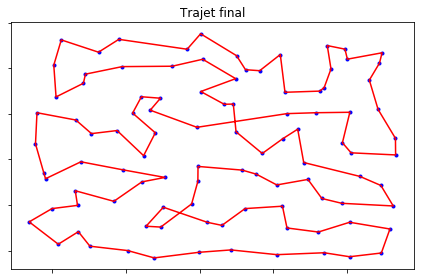

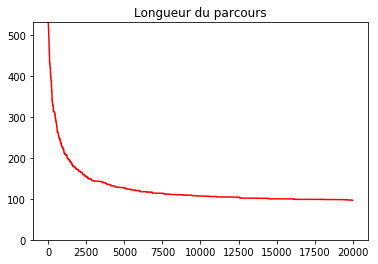

In [34]:
# Affichage du trajet final 

plt.figure()
plt.plot(Xvilles,Yvilles,"b.")
X_itineraire=[Xvilles[x[i]] for i in range(N)]+[Xvilles[x[0]]]
Y_itineraire=[Yvilles[x[i]] for i in range(N)]+[Yvilles[x[0]]]
plt.plot(X_itineraire,Y_itineraire,"r")
plt.xlim((ax,bx))
plt.ylim((ay,by))
plt.title("Trajet final")
frame1 = plt.gca()
frame1.set_xticklabels(()) 
frame1.set_yticklabels(()) 
plt.tight_layout() 
plt.show()

# Affichage de la longueur du parcours au fur et à mesure des itérations

plt.figure()
plt.plot(range(Npas+1),Energies,"r")
plt.title("Longueur du parcours")
plt.ylim((0,max(Energies)))
plt.show()